In [1]:
#Install package to plot correlation matrix
#install.packages("corrplot")
library(glue)

library(ggplot2)



#install.packages("ggpubr")


#function to compute coefficient of linear correlation between two independent random variables
corr_arr <- function(a,b){
  
  corr = 0
  a_bar <-  sum(a)/length(a)
  
  b_bar <- sum(b)/length(b)
  
  var_a  =  sum((a - a_bar)^2)/(length(a) - 1)
  
  var_b  =  sum((b - b_bar)^2)/(length(b) - 1)
  
  covar_a_b =  sum((a -  a_bar) * (b -  b_bar))/ (length(b) - 1)
  
  corr = covar_a_b/sqrt(var_a * var_b)
  return(corr)
}


#function to compute and build the correlation matrix between the variables under our observation
display_correlation  <-  function(data){
  #we are encoding the sex feature (F,M) -> (1,2)
  data$City_Category = as.numeric(factor(data$City_Category,levels = c(unique(data$City_Category)),labels = c(1, 2,3)))
  data$Gender = as.numeric(factor(data$Gender,levels = c("F","M"),labels = c(1, 2)))
  result <- matrix(, nrow = ncol(data), ncol =ncol(data))
  for (i in  1:ncol(data)){
    for (j in 1:ncol(data)){
      result[i,j] <- corr_arr(data[,i],data[,j])
    }
  }
  colnames(result) <- colnames(data)
  rownames(result) <- colnames(data)
  return(result)
}


## (1) Undertake a descriptive analysis of the variables in this dataset.

In [2]:
##We load the data 
data <-  read.csv("data_purchase_behaviour.csv",header = T)
data$X <- NULL
#We attach the data to give the column names global scope
attach(data)


In [3]:
#We are observing the correlation between the variables in the dataset
res <-  display_correlation(data)


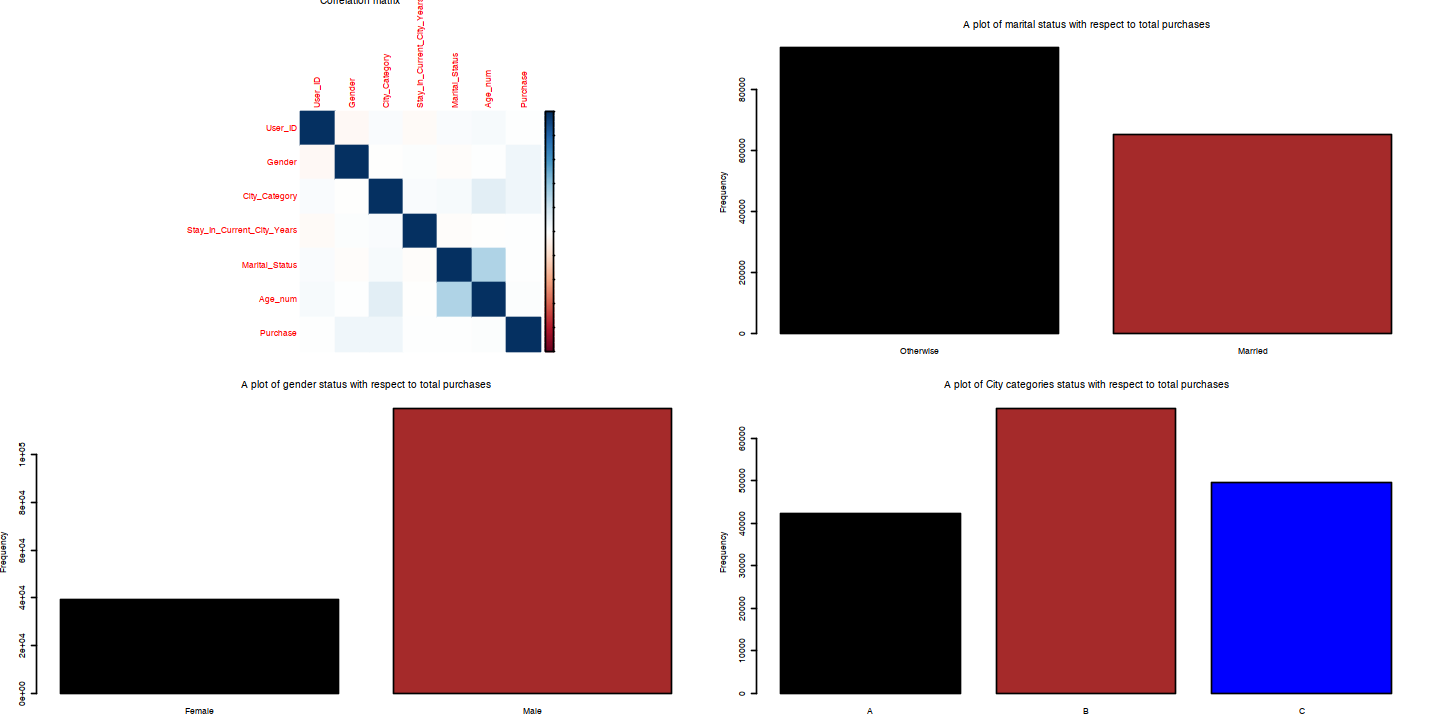

In [26]:
#basic visualizations 


options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(2,2))
# make labels and margins smaller
par(cex=0.4,mai=c(0.2,0.3,0.4,0.2))
corrplot::corrplot(res,method="color",title="Correlation matrix")

##We are visualizing marital status
ms =  table(data$Marital_Status)
barplot(ms,main = "A plot of marital status with respect to total purchases",
        ylab = "Frequency",xlab ="Marital status",col=c("black","brown"),names=c("Otherwise","Married"))

##We are inspecting gender categories as per total purchases
gen =  table(data$Gender)
barplot(gen,main = "A plot of gender status with respect to total purchases",
        ylab = "Frequency",xlab ="Gender",col=c("black","brown"),names=c("Female","Male"))


cc =  table(data$City_Category)
barplot(cc,main = "A plot of City categories status with respect to total purchases",
        ylab = "Frequency",xlab ="City Categories",col=c("black","brown","blue"),names=c("A","B","C"))

#boxplot(Age_num,Purchase,col="brown")



In [5]:
res

,User_ID,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Age_num,Purchase
User_ID,1.000000000,-0.034134818,0.027642089,-0.029020530,0.0238976986,0.036897191,0.0073416443
Gender,-0.034134818,1.000000000,-0.005230666,0.013860140,-0.0102179171,0.001798109,0.0605722322
City_Category,0.027642089,-0.005230666,1.000000000,0.023988941,0.0396761385,0.123404239,0.0630847513
Stay_In_Current_City_Years,-0.029020530,0.013860140,0.023988941,1.000000000,-0.0142119697,-0.005657654,0.0015260475
Marital_Status,0.023897699,-0.010217917,0.039676138,-0.014211970,1.0000000000,0.300598738,0.0001091632
Age_num,0.036897191,0.001798109,0.123404239,-0.005657654,0.3005987381,1.000000000,0.0156330549
Purchase,0.007341644,0.060572232,0.063084751,0.001526048,0.0001091632,0.015633055,1.0000000000


In [6]:
summary(data,digits=4)

    User_ID           Gender          City_Category     
 Min.   :1000001   Length:159000      Length:159000     
 1st Qu.:1001523   Class :character   Class :character  
 Median :1003084   Mode  :character   Mode  :character  
 Mean   :1003033                                        
 3rd Qu.:1004482                                        
 Max.   :1006040                                        
 Stay_In_Current_City_Years Marital_Status     Age_num         Purchase    
 Min.   :0.000              Min.   :0.000   Min.   :10.00   Min.   :   12  
 1st Qu.:1.000              1st Qu.:0.000   1st Qu.:27.00   1st Qu.: 5828  
 Median :2.000              Median :0.000   Median :33.00   Median : 8044  
 Mean   :1.856              Mean   :0.411   Mean   :34.81   Mean   : 9270  
 3rd Qu.:3.000              3rd Qu.:1.000   3rd Qu.:42.00   3rd Qu.:12059  
 Max.   :4.000              Max.   :1.000   Max.   :75.00   Max.   :23961  

From the observed data, purchases are done less by married people as compared to the other segment of customers.

There are more (almost 3 times) male purchases as compared to females. The minimum age of customers who do purchases is 10 years

## (2) Use this dataset to build a linear regression model to predict the purchase amount.
### Justify all the choices you make to arrive at your final model

In [8]:
##Model selection phase 
model1 =  lm(Purchase~Gender+City_Category+Stay_In_Current_City_Years+Marital_Status+Age_num,data=data)


In [9]:
summary(model1)


Call:
lm(formula = Purchase ~ Gender + City_Category + Stay_In_Current_City_Years + 
    Marital_Status + Age_num, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-10064  -3435  -1180   2910  15436 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                8275.000     51.316 161.256  < 2e-16 ***
GenderM                     707.573     29.092  24.322  < 2e-16 ***
City_CategoryB              232.896     31.129   7.482 7.38e-14 ***
City_CategoryC              816.136     33.394  24.440  < 2e-16 ***
Stay_In_Current_City_Years   -2.406      9.745  -0.247 0.804987    
Marital_Status              -44.760     26.760  -1.673 0.094399 .  
Age_num                       3.834      1.127   3.402 0.000669 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5006 on 158993 degrees of freedom
Multiple R-squared:  0.008064,	Adjusted R-squared:  0.008026 
F-statistic: 215.4 on 6 and 158993 DF, 

In [10]:
model2 =  lm(Purchase~Gender+City_Category++Age_num,data=data)

In [11]:
summary(model2)


Call:
lm(formula = Purchase ~ Gender + City_Category + +Age_num, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-10024  -3434  -1181   2910  15437 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8271.658     48.229 171.509  < 2e-16 ***
GenderM         708.019     29.088  24.341  < 2e-16 ***
City_CategoryB  232.321     31.119   7.465 8.34e-14 ***
City_CategoryC  815.757     33.383  24.436  < 2e-16 ***
Age_num           3.274      1.076   3.044  0.00234 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5006 on 158995 degrees of freedom
Multiple R-squared:  0.008046,	Adjusted R-squared:  0.008021 
F-statistic: 322.4 on 4 and 158995 DF,  p-value: < 2.2e-16


## (3) Interpret your final model.

From the model summary, the parmater estimates for the observered variables indicate that the variables Gender, City Category and Age have high signicance levels for the variability of the response variable Purchage. More importantly, having got positive beta estimates for the observed variables, it is a clear indication that purchages are stronly influenced by Gender cluster male followed by City Category C and the remaining observed varibles. Given the p-values fro the T-Scores of the parameter estimates are lesser than the significance level in the model, we therefore reject the Null Hypotheses.

## (4) Are all the assumptions about your model met?

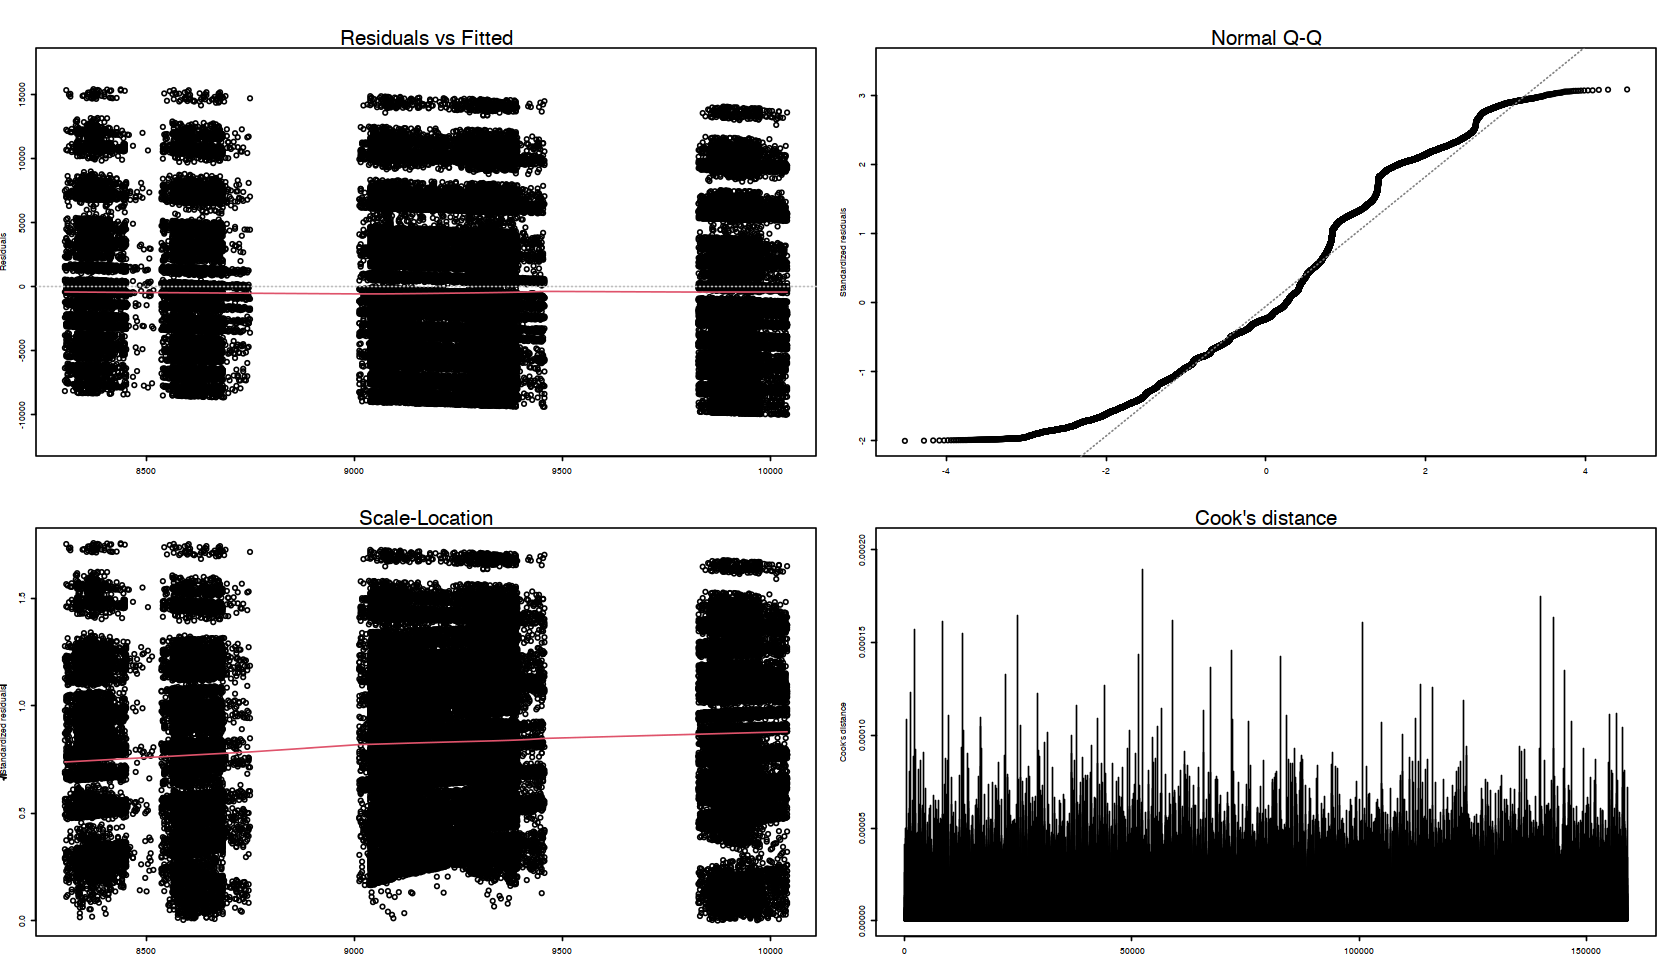

In [39]:
options(repr.plot.width=14, repr.plot.height=8)
par(mfrow=c(2,2))
# make labels and margins smaller
par(cex=0.4,mai=c(0.2,0.3,0.4,0.2))
##Test of assumptions
plot(model2,which=1) #Linearity Assumption


plot(model2,which=2) #Normality Assumption

plot(model2,which=3) #Scale-Location (homoscedasticity)

plot(model2,which=4) #Cook's distance


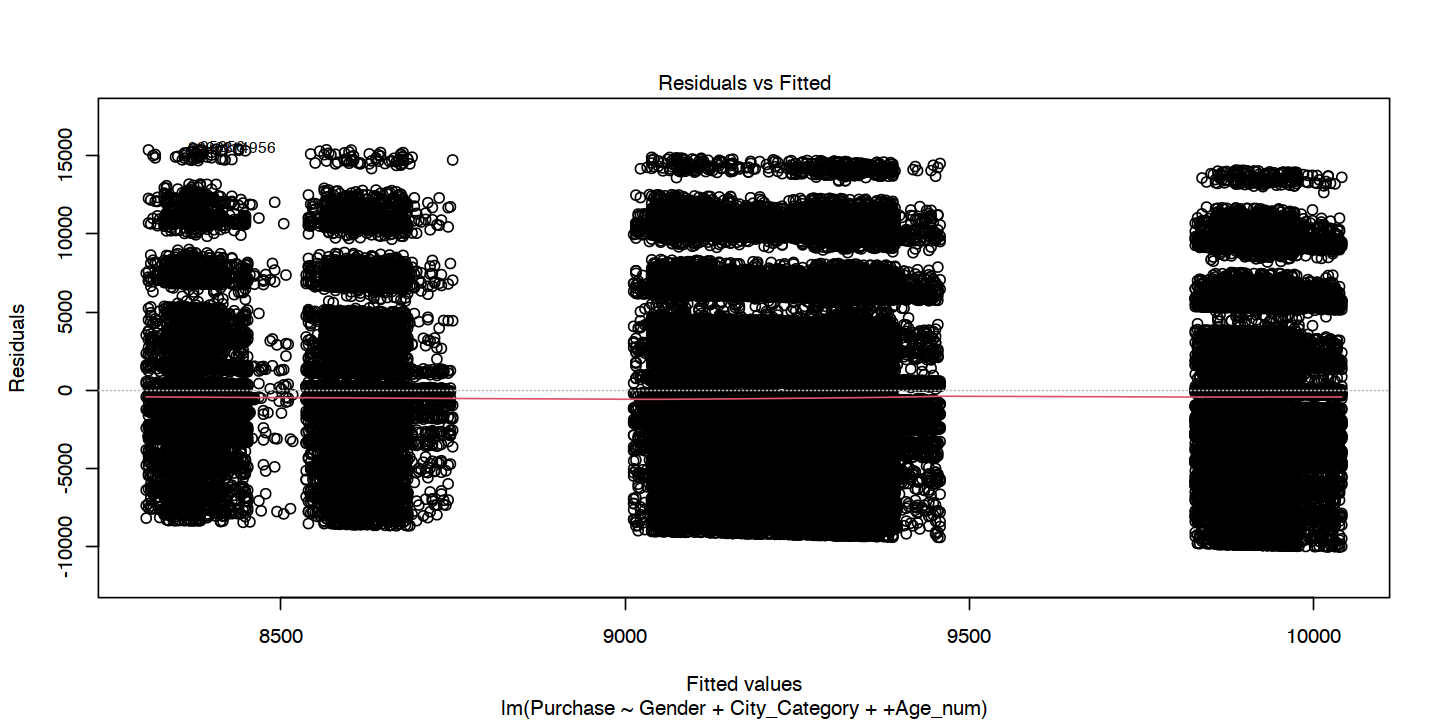

In [12]:
##Test of assumptions

plot(model2,which=1)

## (5) Explain how you can use your final model to help the company improve their sales?

## (6) Suggest possible ways of improving your model 
### (google!)

In that case, you may want to go back to your theory and hypotheses. Is it really a linear relationship between the predictors and the outcome? You may want to include a quadratic term, for example. A log transformation may better represent the phenomena that you’d like to model. Or, is there any important variable that you left out from your model? Other variables you didn’t include (e.g., age or gender) may play an important role in your model and data. Or, maybe, your data were systematically biased when collecting data. You may want to redesign data collection methods.

## (7) Compare your final model to the model built on Gender and Age only

In [16]:
model3 =  lm(Purchase~Gender + Age_num,data=data)
summary(model3)


Call:
lm(formula = Purchase ~ Gender + Age_num, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
 -9691  -3488  -1220   2852  15301 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8509.104     44.969 189.220  < 2e-16 ***
GenderM      705.046     29.147  24.189  < 2e-16 ***
Age_num        6.634      1.070   6.202 5.58e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5017 on 158997 degrees of freedom
Multiple R-squared:  0.00391,	Adjusted R-squared:  0.003897 
F-statistic: 312.1 on 2 and 158997 DF,  p-value: < 2.2e-16


In [17]:
## Comparison of the two models

anova(model2,model3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,158995,3.984905e+12,NA,NA,NA,NA
2,158997,4.001520e+12,-2,-16614528588,331.4542,2.241529e-144


In [18]:
help(anova)